In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def heiisei_quadra(x):
    return P.copy()

In [5]:
def quadratic_problem2d(Lambda):
    A = np.random.rand(2,2)
    Q,R = np.linalg.qr(A)
    L = np.diag(Lambda)
    P = Q.T@L@Q
    # with P definite positive
    q = np.random.rand(2)
    r = np.random.rand(1) 
    return P,q,r

In [6]:
def cost(x):
    return 1/2*x.T@P@x+q.T@x+r

In [7]:
def gradient(x):
    return P@x+q

In [8]:
def methode_desscente_newton(x_0,cost,gradient,heissein,epsilon=1e-6,max_iter=1e5,rho=1e-3,c_=1e-4,sig=1e-2):
    k=0
    x_t=x0.copy()
    xlist=[]
    flist=[]
    nlist=[]
    d_k=-np.linalg.inv(heissein(x_t))@gradient(x_t)
    nlist.append(np.linalg.norm(gradient(x_t)))
    xlist.append(x_t)
    flist.append(cost(x_t))
    x_t=x_t+d_k
    k=k+1
    while np.linalg.norm(flist[k-2]-cost(x_t))>epsilon and k<max_iter:
        d_k=-np.linalg.inv(heissein(x_t))@gradient(x_t)
        x_t=x_t+d_k
        k=k+1
        nlist.append(np.linalg.norm(gradient(x_t)))
        xlist.append(x_t)
        flist.append(cost(x_t)) 
    return xlist,flist,nlist

C:\Users\Souniz\AppData\Local\Temp\ipykernel_7892\4006831829.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))


<Figure size 1800x1000 with 0 Axes>

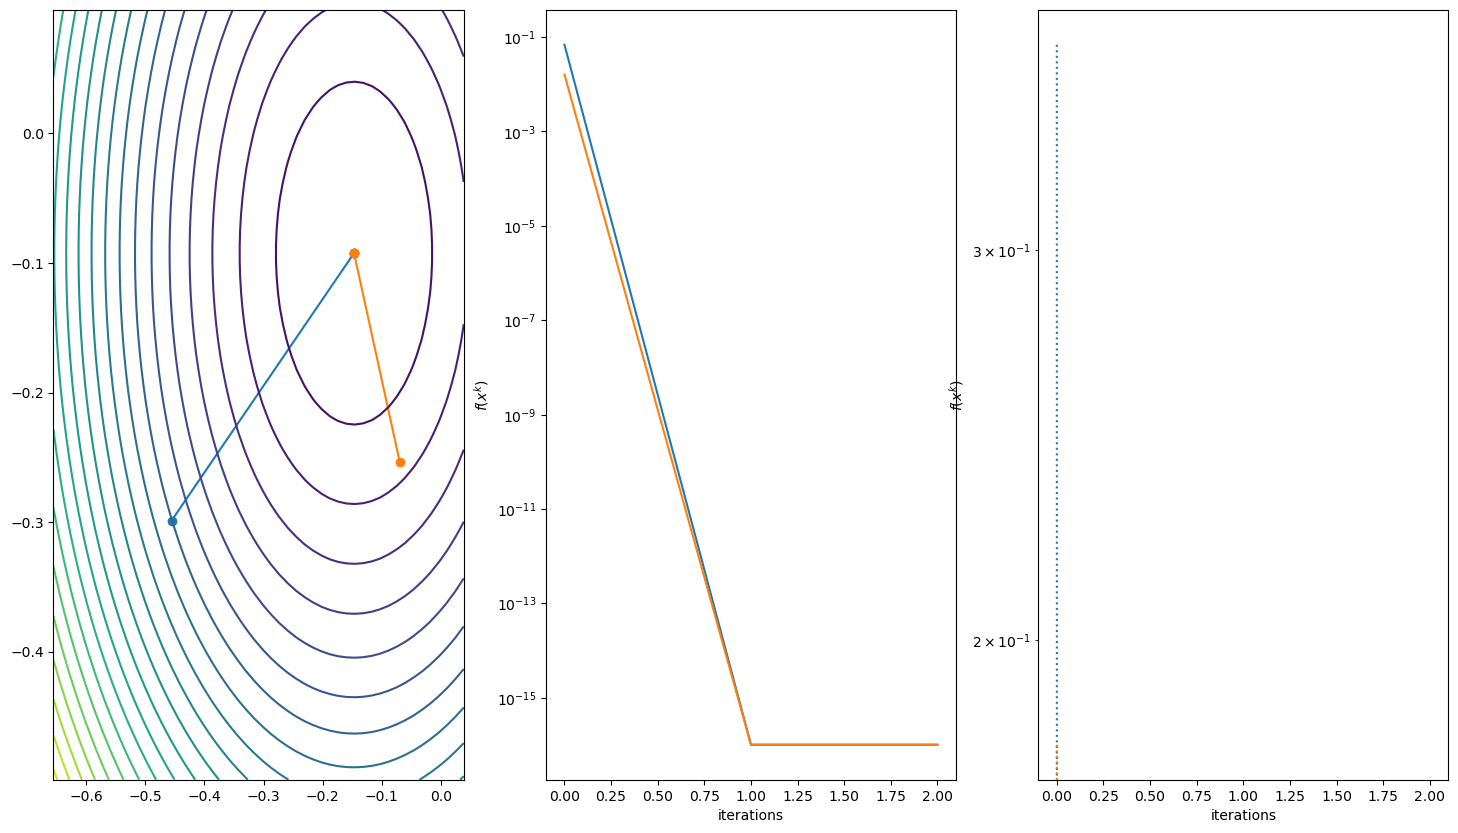

In [9]:
Lambda = np.array((1,1))
np.random.seed(seed=1)
P,q,r= quadratic_problem2d(Lambda)
# check solution existency 
xstar = -np.dot(np.linalg.inv(P),q)
fmin  = cost(xstar)
#grid
ax= xstar[0]
bx = xstar[0]
ay= xstar[1]
by = xstar[1]

for test in range(2):
    x0 = np.copy(xstar) + 2.*(np.random.rand(2)-.5)
    #
 
    xlist,flist,nlist =  methode_desscente_newton(x0,cost,gradient,heiisei_quadra,1e-4)
    xlist = np.asarray(xlist)
    #
    plt.figure(figsize=(18,10))
    fig = plt.figure(1) 
    plt.subplot(1,3,1)
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
#    #
    ax = np.min((xlist[:,0].min(),ax))-.1
    bx = np.max((xlist[:,0].max(),bx))+.1
    ay = np.min((xlist[:,1].min(),ay))-.1
    by = np.max((xlist[:,1].max(),by))+.1
    
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist-fmin+1e-16)
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    
#    
xgrid = np.arange(ax,bx,(bx-ax)/50)
ygrid = np.arange(ay,by,(by-ay)/50)
X, Y = np.meshgrid(xgrid, ygrid)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))


plt.subplot(1,3,1)
plt.contour(X, Y, Z,21)

In [10]:
s= np.copy(xstar) + 2.*(np.random.rand(2)-.5)

In [11]:
def cost_median(x):
    return np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-3*x[1]-0.1)+np.exp(-x[0]-0.1)

In [12]:
def gradient_median(x):
    gradien_x=[]
    gradien_x.append(np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-3*x[1]-0.1)-np.exp(-x[0]-0.1))
    gradien_x.append(3*np.exp(x[0]+3*x[1]-0.1)-3*np.exp(x[0]-3*x[1]-0.1))
    return np.array(gradien_x)

In [13]:
def heissien_median(x):
    h_x=[]
    h_x.append(np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-3*x[1]-0.1)+np.exp(-x[0]-0.1))
    h_x.append(3*np.exp(x[0]+3*x[1]-0.1)-3*np.exp(x[0]-3*x[1]-0.1))
    h_x.append(3*np.exp(x[0]+3*x[1]-0.1)-3*np.exp(x[0]-3*x[1]-0.1))
    h_x.append(9*np.exp(x[0]+3*x[1]-0.1)+9*np.exp(x[0]-3*x[1]-0.1))
    h_x=np.array(h_x)
    return h_x.reshape((2,2))

<Figure size 1800x1000 with 0 Axes>

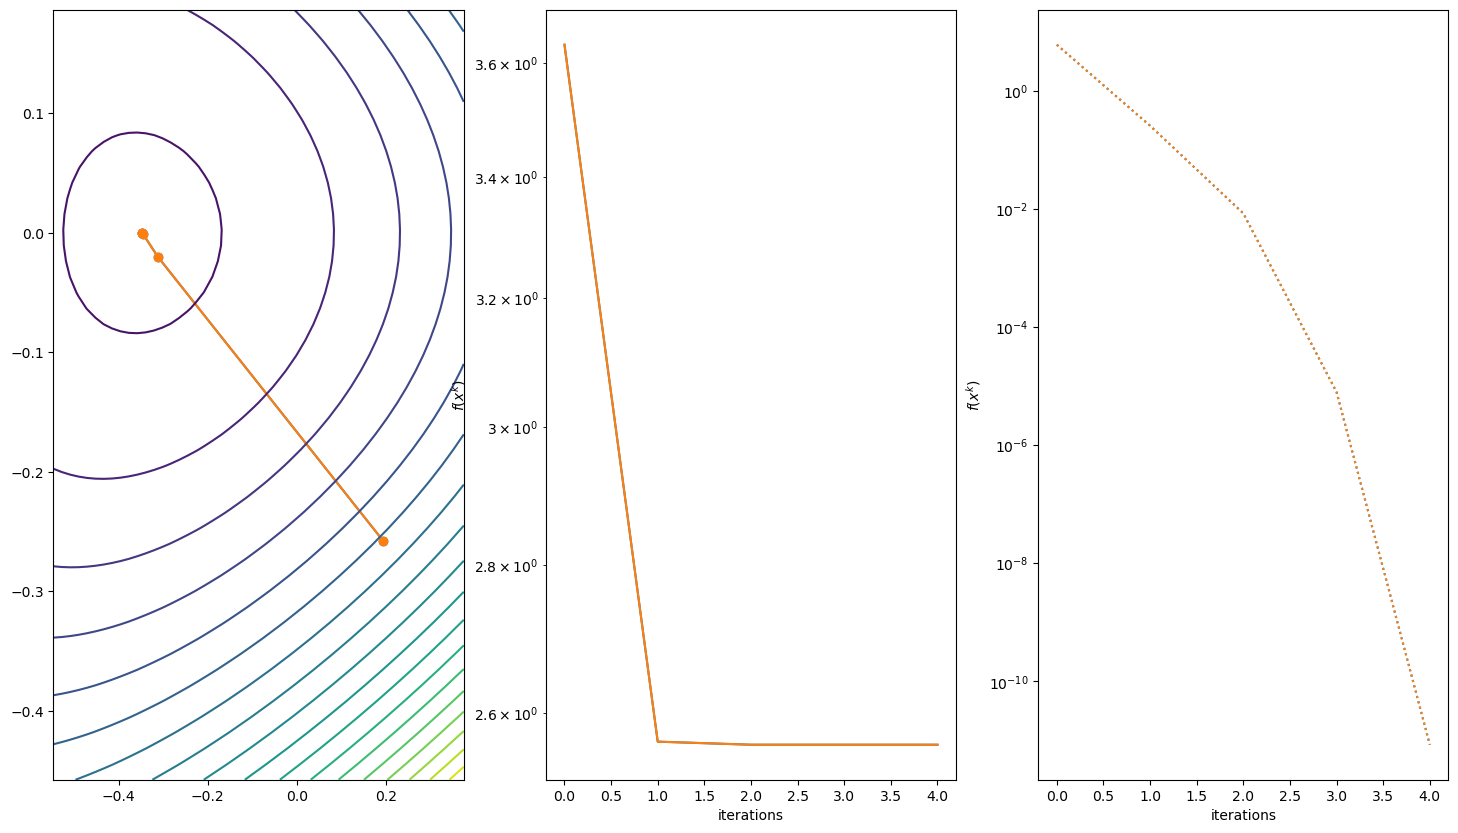

In [20]:
x_star=np.array([-np.log(2)/2,0])
x0=np.copy(xstar) + 2.*(np.random.rand(2)-.5)
ax= x0[0]
bx = x0[0]
ay= x0[1]
by = x0[1]
for test in range(2):
    xlist,flist,nlist =  methode_desscente_newton(x0,cost_median,gradient_median,heissien_median,1e-10)
    xlist = np.asarray(xlist)
    #
    plt.figure(figsize=(18,10))
    fig = plt.figure(1) 
    plt.subplot(1,3,1)
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
#    #
    ax = np.min((xlist[:,0].min(),ax))-.1
    bx = np.max((xlist[:,0].max(),bx))+.1
    ay = np.min((xlist[:,1].min(),ay))-.1
    by = np.max((xlist[:,1].max(),by))+.1
    
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist)
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    
#    
xgrid = np.arange(ax,bx,(bx-ax)/50)
ygrid = np.arange(ay,by,(by-ay)/50)
X, Y = np.meshgrid(xgrid, ygrid)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost_median(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,21)
plt.show()

In [28]:
def create_problem_log(m,n,scale,x0):
    #centered a
    A = scale*(np.random.rand(n,m)-.5)
    b = x0@A + 5*scale*np.random.rand(m)
    c = (np.random.rand(n)-.5)
    return A,b,c

In [32]:
x0=np.array([0,0])
a,b,c=create_problem_log(500,2,2,x0)

In [46]:
def cost_log(x):
    return np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-3*x[1]-0.1)+np.exp(-x[0]-0.1)

In [38]:
def gradient_log(x):
    return c+a@(1/(b-a.T@x)) if (b-a.T@x).all()>0 else np.inf 

In [80]:
def hessien_log(x):
    h=np.zeros((len(x),len(x)))
    for i in range(len(b)):
        h+=np.outer(a[:,i],a[:,i])/((b[i]-a[:,i].T@x)**2)
    return h

In [76]:
hessien_log(x0)

array([[  7092.75949148, -10336.124965  ],
       [-10336.124965  ,  17356.75331684]])

<Figure size 1800x1000 with 0 Axes>

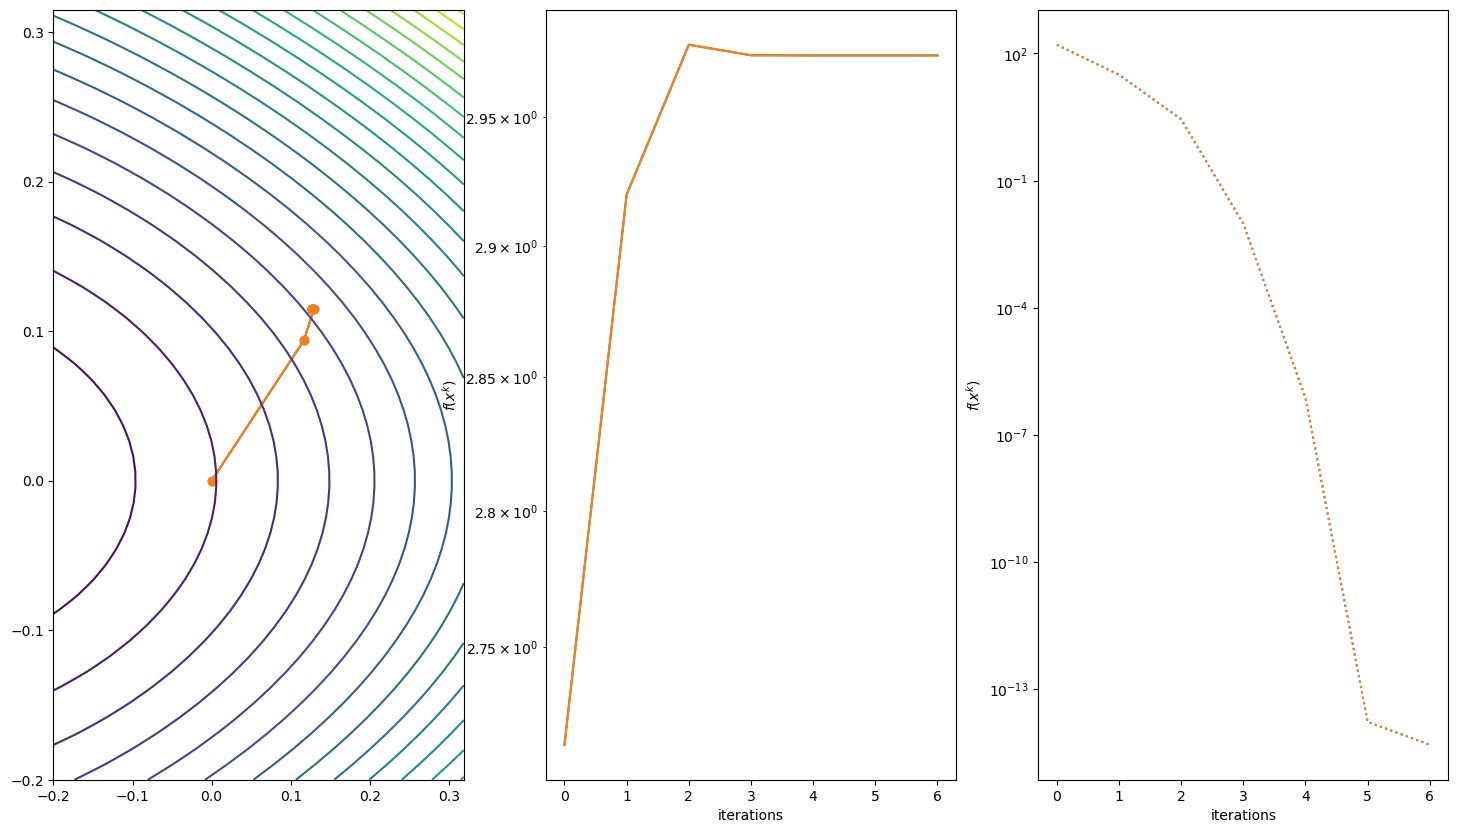

In [78]:
# x_star=np.array([-np.log(2)/2,0])
x0=np.array([0,0])
ax= x0[0]
bx = x0[0]
ay= x0[1]
by = x0[1]
for test in range(2):
    xlist,flist,nlist =  methode_desscente_newton(x0,cost_log,gradient_log,hessien_log,epsilon=1e-10)
    xlist = np.asarray(xlist)
    #
    plt.figure(figsize=(18,10))
    fig = plt.figure(1) 
    plt.subplot(1,3,1)
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
#    #
    ax = np.min((xlist[:,0].min(),ax))-.1
    bx = np.max((xlist[:,0].max(),bx))+.1
    ay = np.min((xlist[:,1].min(),ay))-.1
    by = np.max((xlist[:,1].max(),by))+.1
    
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist)
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    
#    
xgrid = np.arange(ax,bx,(bx-ax)/50)
ygrid = np.arange(ay,by,(by-ay)/50)
X, Y = np.meshgrid(xgrid, ygrid)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost_log(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,21)
plt.show()

In [66]:
def methode_desscente_newton_log(x_0,cost,gradient,heissein,epsilon=1e-6,max_iter=1e5,rho=1e-3,c_=1e-4,sig=1e-2):
    k=0
    x_t=x0.copy()
    xlist=[]
    flist=[]
    nlist=[]
    d_k=-np.linalg.inv(heissein(x_t))@gradient(x_t)
    nlist.append(np.linalg.norm(gradient(x_t)))
    xlist.append(x_t)
    flist.append(cost(x_t))
    x_t=x_t+d_k
    k=k+1
    while np.linalg.norm(flist[k-2]-cost(x_t))>epsilon and k<max_iter:
        d_k=-np.linalg.inv(heissein(x_t))@gradient(x_t)
        x_t=x_t+d_k
        k=k+1
        nlist.append(np.linalg.norm(gradient(x_t)))
        xlist.append(x_t)
        flist.append(cost(x_t)) 
    return xlist,flist,nlist

array([  42.07853971, -155.3769626 ])